<img src="CFG_logo.png" width="125">

<h1><center> Big Data Challenge: Sustainability in a Post-Covid World </h1></center>

### The following analysis will help the Emergent Alliance, IBM and R$^2$ Data Labs understand:
1. How did the economy react when businesses had to close? 
2. Were some sectors (for instance energy production) more afffected than others? 
3. Is there a particular impact onto the economy and energy usage levels? 

<img src="EmergentAlliance_logo.jpg" width="225">
<img src="R2DataLabs_logo.jpg" width="250">

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Function for loading Excel data:

In [49]:
def load_excel_data(path, sheet_name=None, index_col=0):
    '''Load specified data set from an Excel sheet
    
    Args:
        path (str): The location of the Excel file.
        sheet_name (str or int or list): Specify which Excel sheet to load, can be sheet name, number (starting at 0) or list of sheets.
        index_col (int): Specify what index header are on.
    
    Returns:
        data: n rows from the dataframe.
    '''
    excel_df = pd.read_excel(path, sheet_name, index_col)
    return excel_df

---------------------------------------------------------------------------------------------------------------------------
## 3) Is there a particular impact onto the economy and energy usage levels? 

### Analysis of the 2020 energy demand compared to 2019 from Major Power Producers and Sustainable Renewables

In [50]:
# Load Excel data from Table 5.3, sheet 'Month'

elec_gen_by_MPP_Q2_months = load_excel_data('ET_5.3_AUG_20.xls', sheet_name='Month', index_col=3)
elec_gen_by_MPP_Q2_months

,Unnamed: 0,Unnamed: 1,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,January,6.300000,3.495000,0.358300,0.874000,1.512000,0.050300,..,..,..
2,1995,February,6.257000,3.437000,0.343000,0.829000,1.589000,0.048600,..,..,..
3,1995,March*,7.443000,4.139000,0.380800,0.947000,1.912000,0.050800,..,..,..
4,1995,April,5.320000,2.560000,0.179800,0.756000,1.776000,0.038800,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...
303,2020,March,3.734560,0.158407,0.012067,1.577485,0.845854,0.050180,0.567809,0.487725,0.0350337
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [76]:
# Rename unlabled columns from the data set

elec_gen_by_MPP_Q2_months_clean = elec_gen_by_MPP_Q2_months.rename(columns = {'Unnamed: 0':'Year', 'Unnamed: 1':'Month'})\
                                                            .drop(index=[0, 307])
elec_gen_by_MPP_Q2_months_clean

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
1,1995,January,6.300000,3.495000,0.358300,0.874000,1.512000,0.050300,..,..,..
2,1995,February,6.257000,3.437000,0.343000,0.829000,1.589000,0.048600,..,..,..
3,1995,March*,7.443000,4.139000,0.380800,0.947000,1.912000,0.050800,..,..,..
4,1995,April,5.320000,2.560000,0.179800,0.756000,1.776000,0.038800,..,..,..
5,1995,May,5.072000,2.452000,0.200000,0.841000,1.551000,0.018800,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...
302,2020,February,3.769000,0.293049,0.012908,1.232960,0.991432,0.053492,0.72381,0.445655,0.0156959
303,2020,March,3.734560,0.158407,0.012067,1.577485,0.845854,0.050180,0.567809,0.487725,0.0350337
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457


Text(0.5, 1.0, 'Total fuel used in electricity generation by Major Power Producers (MMPs)\n from 1995 to 2020')

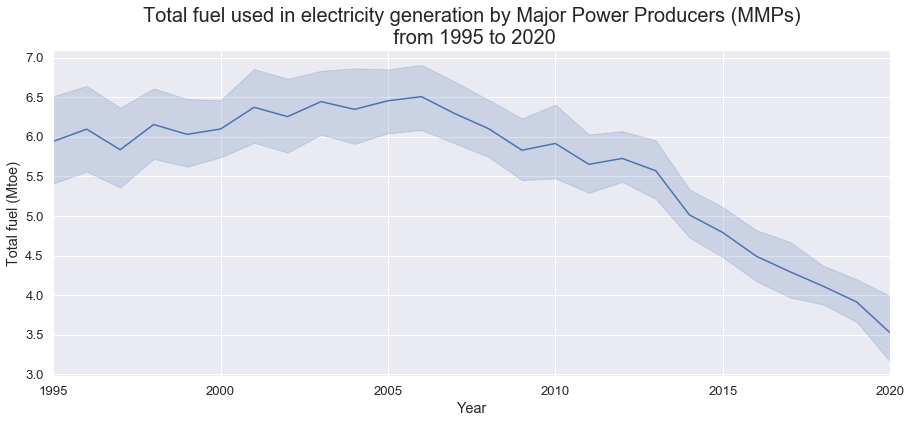

In [216]:
# Create a plot of total fuel used in electricity generation by Major Power Producers (MMPs) from 1995 to 2020

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(font_scale=1.2)

sns.lineplot(data=elec_gen_by_MPP_Q2_months_clean, x='Year', y='Total', ax=ax)

ax.set(xlabel='Year', ylabel='Total fuel (Mtoe)')
plt.xlim(1995, 2020)

ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n from 1995 to 2020', fontsize=20)

### Quantitative analysis of the total fuel used in electricity generation by Major Power Producers (MMPs) from 1995 to 2020

- The above plot shows the mean and 95% confidence interval of the total fuel used in electricity generation by MMPs from 1995 to 2020
    - From approximately 2006, there has been a decreasing trend 
    - In 2020, it has almost halved from its peak years in the early 2000s
    - Since 2010, the UK has been a net importer of electricity which explains the steady decrease of UK electricity generation

<br>

In [52]:
# Create a seperate dataframe with just April, May and June 2020 data

elec_gen_by_MPP_2020 = elec_gen_by_MPP_Q2_months_clean[elec_gen_by_MPP_Q2_months_clean['Year']==2020]
elec_gen_by_MPP_2020_amj = elec_gen_by_MPP_2020.iloc[3:6]
elec_gen_by_MPP_2020_amj

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [53]:
# Create a seperate dataframe with just April, May and June 2019 data

elec_gen_by_MPP_2019 = elec_gen_by_MPP_Q2_months_clean[elec_gen_by_MPP_Q2_months_clean['Year']==2019]
elec_gen_by_MPP_2019_amj = elec_gen_by_MPP_2019.iloc[3:6]
elec_gen_by_MPP_2019_amj

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
292,2019,April,3.795566,0.081211,0.009096,1.771330,1.148695,0.018422,0.349022,0.378409,0.0393808
293,2019,May,3.684179,0.015821,0.010125,1.781089,1.141701,0.011291,0.23311,0.445232,0.045809
294,2019,June,3.303601,0.030337,0.009709,1.685580,0.791767,0.019667,0.30761,0.418889,0.040042


In [54]:
# Create a dataframe with just April, May and June 2019 and 2020 data

elec_gen_by_MPP_2019_2020_amj = pd.concat([elec_gen_by_MPP_2019_amj, elec_gen_by_MPP_2020_amj])
elec_gen_by_MPP_2019_2020_amj.set_index(['Year', 'Month'])

Total      Coal       Oil       Gas   Nuclear     Hydro  \
Year Month                                                               
2019 April  3.795566  0.081211  0.009096  1.771330  1.148695  0.018422   
     May    3.684179  0.015821  0.010125  1.781089  1.141701  0.011291   
     June   3.303601  0.030337  0.009709  1.685580  0.791767  0.019667   
2020 April  3.030282  0.044485  0.007019  1.165947  0.948713  0.025804   
     May    3.044369  0.019191  0.005774  1.105274  1.030223  0.020148   
     June   3.085639  0.039362  0.005563  1.346934  0.821137  0.019213   

                Wind Bioenergy      Solar  
Year Month                                 
2019 April  0.349022  0.378409  0.0393808  
     May     0.23311  0.445232   0.045809  
     June    0.30761  0.418889   0.040042  
2020 April  0.345542  0.442426  0.0503458  
     May    0.322117  0.480496  0.0611457  
     June   0.340155   0.46688  0.0463951

### Multiple plots showing the comparison between energy generation fuels in April, May and June 2019 vs 2020

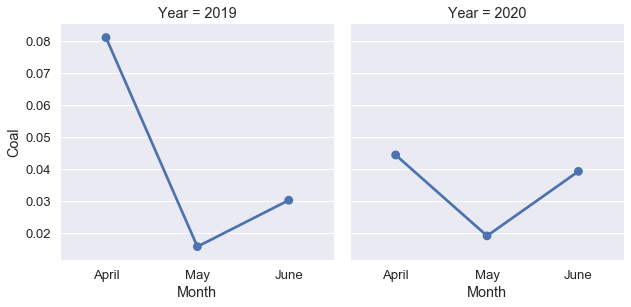

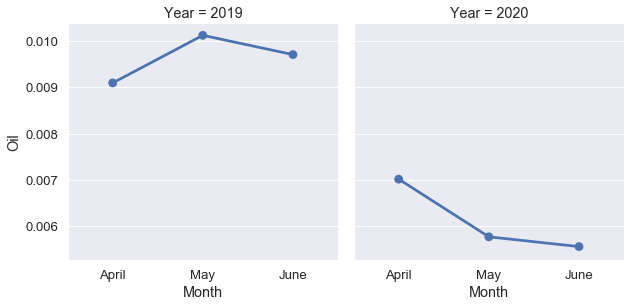

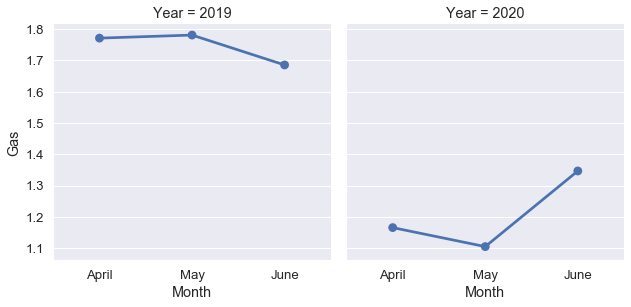

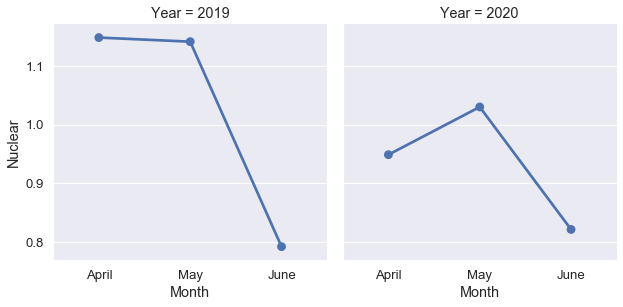

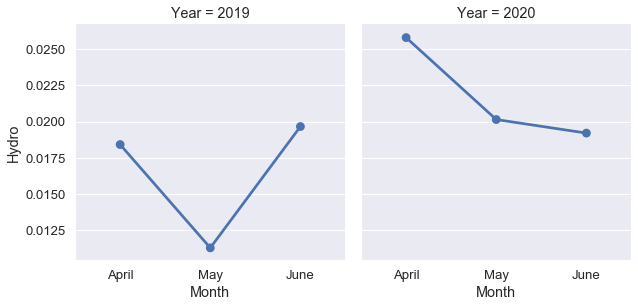

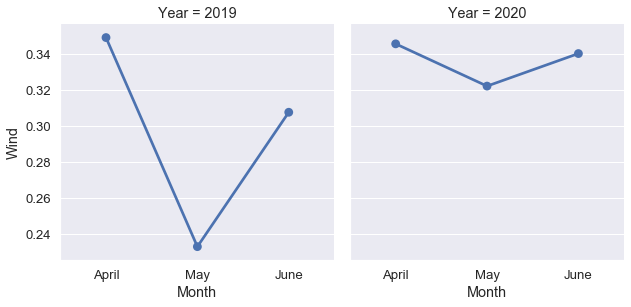

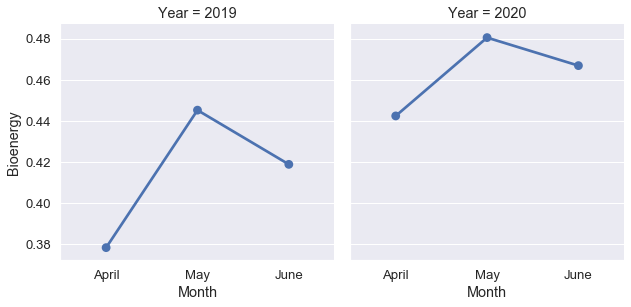

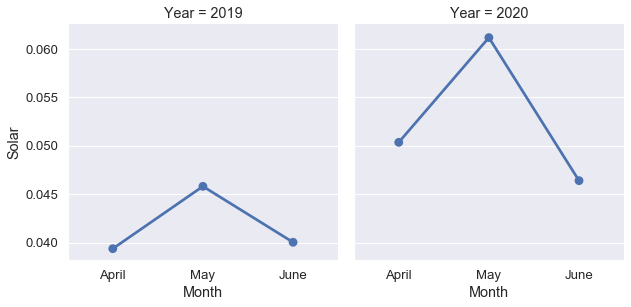

In [143]:
sns.set(font_scale=1.2)

order = ['April', 'May', 'June']

for col in elec_gen_by_MPP_2019_2020_amj.columns[3:]:
    elec_gen_by_MPP_2019_2020_amj_plot = sns.FacetGrid(elec_gen_by_MPP_2019_2020_amj, col='Year', height=4.5, aspect=1)
    elec_gen_by_MPP_2019_2020_amj_plot.map(sns.pointplot, 'Month', col, order=order)


### Plot showing the comparison between total energy generation from fuels in April, May and June 2019 vs 2020 

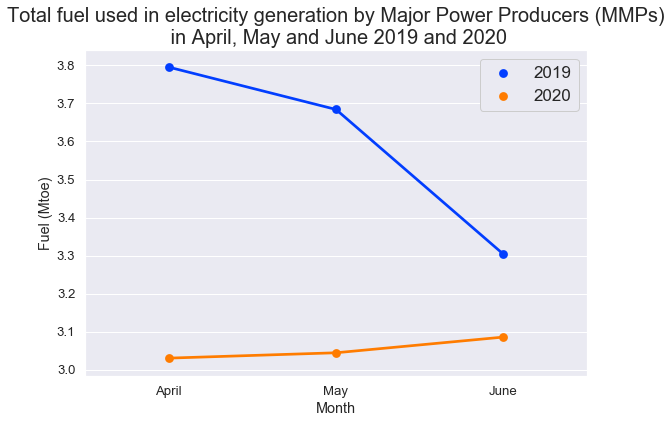

In [138]:
fig, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.2)

sns.pointplot(data=elec_gen_by_MPP_2019_2020_amj, x='Month', y='Total', hue='Year', palette='bright', ax=ax)

ax.set(xlabel='Month', ylabel='Fuel (Mtoe)')
ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n in April, May and June 2019 and 2020', fontsize=20)

ax.legend(prop={'size': 17}, framealpha=1.0)

In [57]:
elec_gen_by_MPP_2019_amj['Total'].describe()

count    3.000000
mean     3.594449
std      0.257965
min      3.303601
25%      3.493890
50%      3.684179
75%      3.739873
max      3.795566
Name: Total, dtype: float64

In [58]:
elec_gen_by_MPP_2020_amj['Total'].describe()

count    3.000000
mean     3.053430
std      0.028770
min      3.030282
25%      3.037325
50%      3.044369
75%      3.065004
max      3.085639
Name: Total, dtype: float64

<br><br>
Function for calculating the difference of various statistics from the data:

In [59]:
def difference(num1, num2, func):
    ''' Calculate the numerical difference between 2 statistics.
    
    Args:
        num1 (float): The first number.
        num2 (float): The second number. 
        func (function): Function to operate on both numbers. 
        
    Returns:
        Numerical difference between a function of num1 and num2.
    '''
    return func(num1) - func(num2)

In [60]:
# Mean difference
elec_gen_by_MPP_2019_2020_amj_mean = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.mean)

# Minimum difference 
elec_gen_by_MPP_2019_2020_amj_min = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.min)

# Maximum difference
elec_gen_by_MPP_2019_2020_amj_max = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.max)

In [61]:
# IQR difference
elec_gen_by_MPP_2020_amj_q75, elec_gen_by_MPP_2020_amj_q25 = np.percentile(elec_gen_by_MPP_2020_amj['Total'], [75, 25])
elec_gen_by_MPP_2019_amj_q75, elec_gen_by_MPP_2019_amj_q25 = np.percentile(elec_gen_by_MPP_2019_amj['Total'], [75, 25])

elec_gen_by_MPP_2020_amj_IQR = elec_gen_by_MPP_2020_amj_q75 - elec_gen_by_MPP_2020_amj_q25
elec_gen_by_MPP_2019_amj_IQR = elec_gen_by_MPP_2019_amj_q75 - elec_gen_by_MPP_2019_amj_q25

elec_gen_by_MPP_2019_2020_amj_IQR = elec_gen_by_MPP_2020_amj_IQR - elec_gen_by_MPP_2019_amj_IQR

Function for calculating the percentage difference of various statistics from the data:

In [62]:
def percentage_diff(diff, num1, func):
    ''' Calculate the percentage difference between 2 statistics.
    
    Args:
        diff (float): The numerical difference between the two numbers we want the percentage difference of.
        num1 (float): The original number used when calculating the difference.
        func (function): Function to operate on the original number. 
        
    Returns:
        Percentage difference.
    '''
    perc_diff = (diff / func(num1)) * 100
    return perc_diff

In [63]:
# Mean percentage difference
elec_gen_by_MPP_2019_2020_amj_mean_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_mean, elec_gen_by_MPP_2020_amj['Total'], np.mean)

# Minimum percentage difference
elec_gen_by_MPP_2019_2020_amj_max_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_min, elec_gen_by_MPP_2020_amj['Total'], np.min)

# Maximum percentage difference
elec_gen_by_MPP_2019_2020_amj_min_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_max, elec_gen_by_MPP_2020_amj['Total'], np.max)

# IQR percentage difference
elec_gen_by_MPP_2019_2020_amj_IQR_pd = (elec_gen_by_MPP_2019_2020_amj_IQR / elec_gen_by_MPP_2020_amj_IQR) * 100

In [64]:
# Create a dataframe for the summary statistics of April, May and June 2019 and 2020

elec_gen_by_MPP_2019_2020_amj_stats = {
    'Statistic': ['Mean', 'Minimum', 'Maximum', 'IQR'],
    'Difference': [elec_gen_by_MPP_2019_2020_amj_mean, elec_gen_by_MPP_2019_2020_amj_min, elec_gen_by_MPP_2019_2020_amj_max, elec_gen_by_MPP_2019_2020_amj_IQR],
    '% Difference': [elec_gen_by_MPP_2019_2020_amj_mean_pd, elec_gen_by_MPP_2019_2020_amj_max_pd, elec_gen_by_MPP_2019_2020_amj_min_pd, elec_gen_by_MPP_2019_2020_amj_IQR_pd]
}

elec_gen_by_MPP_2019_2020_amj_stats_df = pd.DataFrame(elec_gen_by_MPP_2019_2020_amj_stats).set_index('Statistic')

### From April, May and June 2019 to 2020, the total fuel used in electricity generation by MMPs overall decreased. The following statistics summarise the quantitative analysis:

In [65]:
elec_gen_by_MPP_2019_2020_amj_stats_df

,Difference,% Difference
Statistic,,
Mean,-0.541019,-17.718389
Minimum,-0.273319,-9.019590
Maximum,-0.709927,-23.007446
IQR,-0.218304,-788.704328


### Qualitative analysis of the decrease in total fuel used in electricity generation by MMPs in April, May and June 2020 compared to the same period in 2019

- Increased renewable energy generation (wind, solar, hydro and bioenergy) as seen on the Facet Grids above
    - Large storms during January and February 2020
    - Large period of warm weather from March - June 2020
<br><br>
- UK's COVID-19 lockdown started on the 23rd March 2020 which forced the closure of many UK businesses and offices
    - Increased number of people working from home 
    - Large amounts of electricity used to power the UK's commercial sector was neither needed nor used 
    - Resulted in an overall decresase in demand for electricity 

### Quantitative analysis of the total fuel used in electricity generation by Major Power Producers (MMPs) in 2019 and 2020

In [95]:
# Create a dataframe with only the months of 2019 and 2020 data for fuel used in electricity generation by MMPs

elec_gen_by_MPP_2019_2020_months = pd.concat([elec_gen_by_MPP_2019, elec_gen_by_MPP_2020])
elec_gen_by_MPP_2019_2020_months.set_index(['Year', 'Month'])

Total      Coal       Oil       Gas   Nuclear     Hydro  \
Year Month                                                                   
2019 January    4.974732  0.496966  0.024492  2.401304  1.148261  0.034654   
     February   3.886936  0.170772  0.012758  1.767376  1.074694  0.032953   
     March      3.908008  0.124310  0.008913  1.705206  1.057124  0.045886   
     April      3.795566  0.081211  0.009096  1.771330  1.148695  0.018422   
     May        3.684179  0.015821  0.010125  1.781089  1.141701  0.011291   
     June       3.303601  0.030337  0.009709  1.685580  0.791767  0.019667   
     July       3.568206  0.043610  0.013483  1.814548  0.962963  0.020336   
     August     3.405554  0.095831  0.010036  1.349623  1.075062  0.030033   
     September  3.498622  0.060115  0.012049  1.403742  1.168185  0.036702   
     October    4.116886  0.124163  0.012311  1.819542  1.247612  0.040741   
     November   4.453896  0.308800  0.015510  1.962124  1.209659  0.023917   
     December   4.348215  0.290018  0.015225  1.614391  1.226800  0.045659   
2020 January    4.464054  0.416564  0.013952  1.536764  1.254131  0.051626   
     February   3.769000  0.293049  0.012908  1.232960  0.991432  0.053492   
     March      3.734560  0.158407  0.012067  1.577485  0.845854  0.050180   
     April      3.030282  0.044485  0.007019  1.165947  0.948713  0.025804   
     May        3.044369  0.019191  0.005774  1.105274  1.030223  0.020148   
     June       3.085639  0.039362  0.005563  1.346934  0.821137  0.019213   

                    Wind Bioenergy       Solar  
Year Month                                      
2019 January     0.41461  0.446024  0.00842029  
     February   0.429419  0.379759   0.0192056  
     March      0.510813  0.427663   0.0280951  
     April      0.349022  0.378409   0.0393808  
     May         0.23311  0.445232    0.045809  
     June        0.30761  0.418889    0.040042  
     July       0.258122  0.410556   0.0445902  
     August     0.386648   0.41757   0.0407524  
     September  0.400214  0.385669   0.0319453  
     October    0.471608  0.383068   0.0178402  
     November   0.402643   0.52239  0.00885461  
     December   0.571701   0.57743    0.006991  
2020 January    0.653239  0.529337  0.00843995  
     February    0.72381  0.445655   0.0156959  
     March      0.567809  0.487725   0.0350337  
     April      0.345542  0.442426   0.0503458  
     May        0.322117  0.480496   0.0611457  
     June       0.340155   0.46688   0.0463951

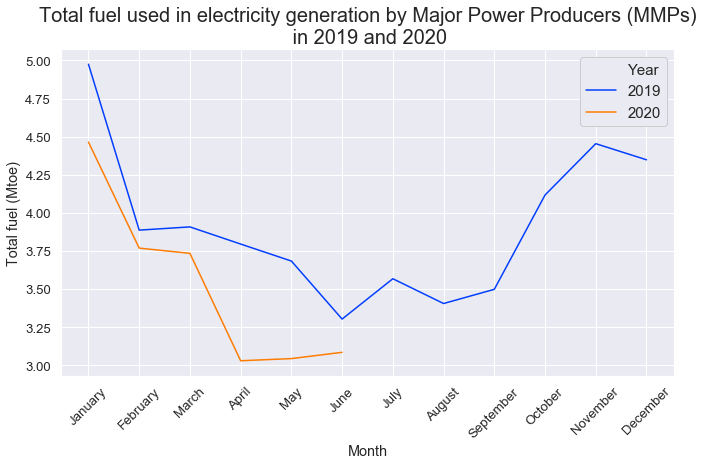

In [178]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.set(font_scale=1.2)

sns.lineplot(data=elec_gen_by_MPP_2019_2020_months, x='Month', y='Total', hue='Year', palette='bright', ax=ax, sort=False)

ax.set(xlabel='Month', ylabel='Total fuel (Mtoe)')
plt.xticks(rotation=45)
ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n in 2019 and 2020', fontsize=20)

ax.legend(prop={'size': 15}, framealpha=1.0)

### Qualitative analysis of the trends in total fuel used in electricity generation by MMPs in 2019 and 2020

- Increased fuel usage for electricity generation in winter months of 2019 (as expected)
- Decreased fuel usage for electricity generation in summer months of 2019 (as expected)
<br><br>
- Increased fuel usage for electricity generation in January of 2020 as expected, with a decrease of 0.510678 Mtoe of total fuel usage compared to January 2019
    - Due to the temperatures in January 2020 being higher than in January 2019
<br><br>
- Trend in total fuel usage consistent throughout January - March 2020 compared to the same period in 2019
<br><br>
- UK's COVID-19 lockdown started on the 23rd March 2020, which subsequently decreased total fuel usage sharply
    - 0.765284 Mtoe of total fuel usage decrease in April 2020 compared to April 2019
    - Total fuel usage between March and April 2020 decreased by 0.704278, compared to a decrease of 0.112442 in the same period in 2019
<br><br>
- Total fuel usage leveling off thoughout April - June 2020, with a small increase as lockdown restrictions were eased
- As of June 2020, total fuel usage levels by MMPs is not as high as corresponding periods in 2019